In [1]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [2]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.sentiment import SentimentIntensityAnalyzer

%matplotlib inline

/opt/conda/lib/python3.7/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/pandas/master/dataset/Pfizer%20Vaccine%20Tweets/vaccination_tweets.csv").fillna('')

In [4]:
df.drop(["id","user_created"],axis=1,inplace=True)

In [5]:
df.head()

,user_name,user_location,user_description,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,,Twitter Web App,1,1,False
2,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",,Twitter Web App,446,2129,False
4,Citizen News Channel,,Citizen News Channel bringing you an alternati...,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [6]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [7]:
df.dtypes

user_name           object
user_location       object
user_description    object
user_followers       int64
user_friends         int64
user_favourites      int64
user_verified         bool
date                object
text                object
hashtags            object
source              object
retweets             int64
favorites            int64
is_retweet            bool
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7057 entries, 0 to 7056
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_name         7057 non-null   object
 1   user_location     7057 non-null   object
 2   user_description  7057 non-null   object
 3   user_followers    7057 non-null   int64 
 4   user_friends      7057 non-null   int64 
 5   user_favourites   7057 non-null   int64 
 6   user_verified     7057 non-null   bool  
 7   date              7057 non-null   object
 8   text              7057 non-null   object
 9   hashtags          7057 non-null   object
 10  source            7057 non-null   object
 11  retweets          7057 non-null   int64 
 12  favorites         7057 non-null   int64 
 13  is_retweet        7057 non-null   bool  
dtypes: bool(2), int64(5), object(7)
memory usage: 675.5+ KB


In [9]:
import plotly.express as px
px.histogram(df, x="date",  nbins=100,opacity=.5,title="Tweets by date")

<AxesSubplot:>

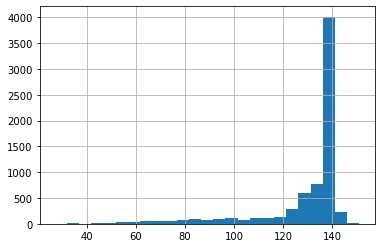

In [10]:
seq_length = [len(i) for i in df['text']]
pd.Series(seq_length).hist(bins = 25)

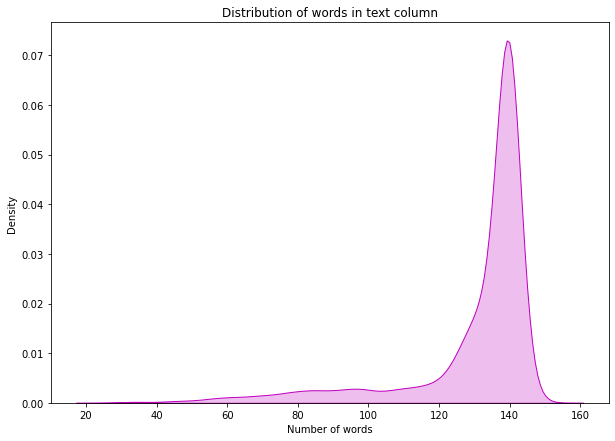

In [11]:
df["num of words in text"] = df["text"].apply(lambda x: len(x))
plt.figure(figsize=(10,7))
sns.kdeplot(df["num of words in text"],shade=True, color='m')
plt.title("Distribution of words in text column")
plt.xlabel("Number of words")
plt.show()

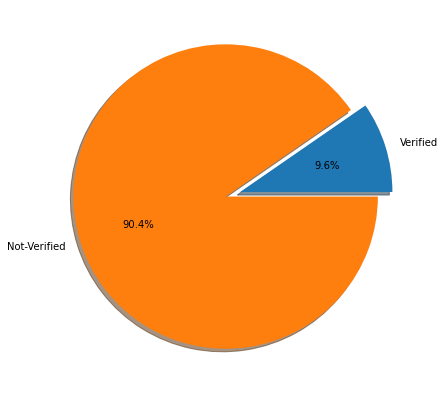

In [12]:
dict_ = df['user_verified'].value_counts().to_dict()
dict_['Verified'] = dict_.pop(True)
dict_['Not-Verified'] = dict_.pop(False)

plt.figure(figsize=(7,7))
plt.pie(x=dict_.values(), labels=dict_.keys(), autopct='%1.1f%%', shadow=True, startangle=0, explode = [0.1, 0])
plt.show()

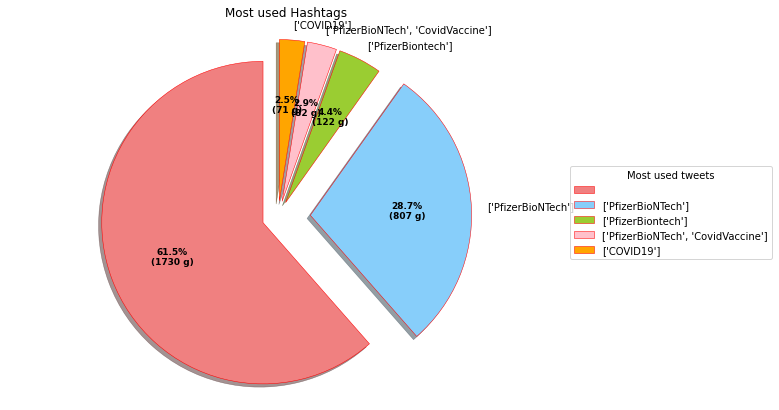

In [13]:
MostUsedTweets = df.hashtags.value_counts().sort_values(ascending=False)[:5]
colors = ['lightcoral', 'lightskyblue', 'yellowgreen', 'pink', 'orange']
explode = (0.1, 0.2, 0.1, 0.1, 0.1) 

# Wedge properties 
wp = { 'linewidth' : 0.5, 'edgecolor' : "red" }

# Creating autocpt arguments 
def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return "{:.1f}%\n({:d} g)".format(pct, absolute) 
  
# Creating the plot 
fig, ax = plt.subplots(figsize =(10, 7)) 
wedges, texts, autotexts = ax.pie(MostUsedTweets,  
                                  autopct = lambda pct: func(pct, MostUsedTweets), 
                                  explode = explode,  
                                  labels = MostUsedTweets.keys(), 
                                  shadow = True, 
                                  colors = colors, 
                                  startangle = 90, 
                                  wedgeprops = wp, 
                                  textprops = dict(color ="black")) 
  
# Adding legend 
ax.legend(wedges, MostUsedTweets.keys(), 
          title ="Most used tweets", 
          loc ="center left", 
          bbox_to_anchor =(1, 0, 0.5, 1)) 


plt.setp(autotexts, size=9, weight="bold") 
ax.set_title("Most used Hashtags") 
plt.axis('equal')
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



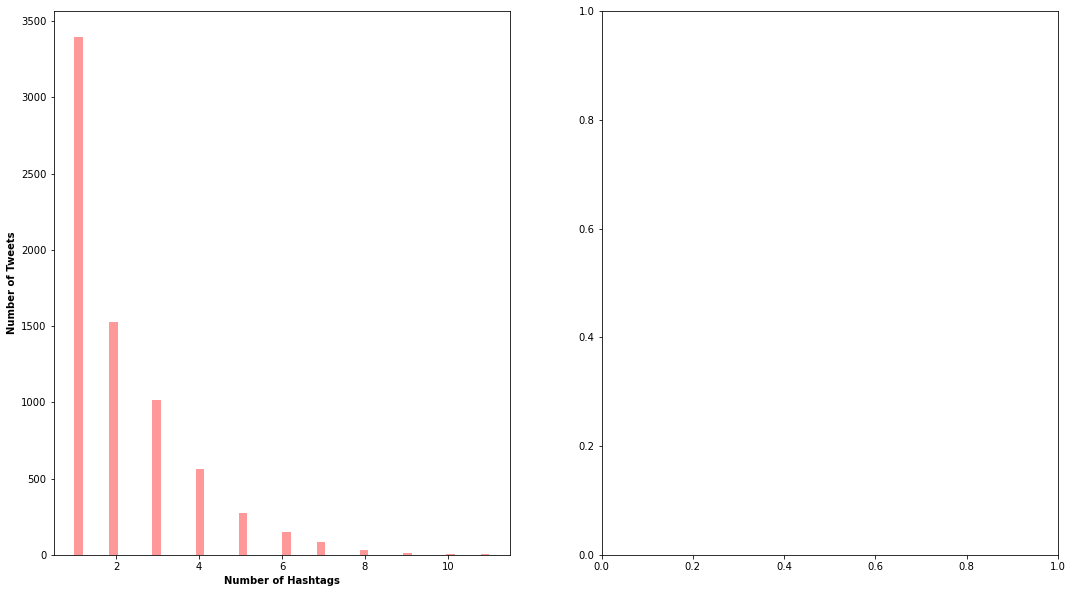

In [14]:
import plotly.graph_objects as go
df['tweet_date']=pd.to_datetime(df['date']).dt.date
tweet_date=df['tweet_date'].value_counts().to_frame().reset_index().rename(columns={'index':'date','tweet_date':'count'})
tweet_date['date']=pd.to_datetime(tweet_date['date'])
tweet_date=tweet_date.sort_values('date',ascending=False)

fig=go.Figure(go.Scatter(x=tweet_date['date'],
                                y=tweet_date['count'],
                               mode='markers+lines',
                               name="Submissions",
                               marker_color='dodgerblue'))

fig.update_layout(
    title_text='Tweets per Day : ({} - {})'.format(df['tweet_date'].sort_values()[0].strftime("%d/%m/%Y"),
                                                       df['tweet_date'].sort_values().iloc[-1].strftime("%d/%m/%Y")),template="plotly_dark",
    title_x=0.5)

fig.show()
fig, ax = plt.subplots(1,2, figsize=(18, 10))

sns.distplot(df['hashtags'].dropna().apply(lambda x: len(x.split(','))).tolist(), kde=False, ax=ax[0], color='red')
ax[0].set_xlabel("Number of Hashtags", weight='bold')
ax[0].set_ylabel('Number of Tweets', weight='bold')

plt.show()

In [15]:
df["date"] = pd.to_datetime(df["date"])
df["Month"] = df["date"].apply(lambda x : x.month)
df["day"] = df["date"].apply(lambda x : x.dayofweek)
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df["day"] = df["day"].map(dmap)

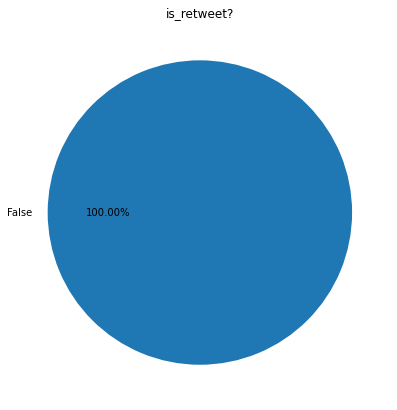

In [16]:
from collections import Counter
y = df['is_retweet']
fig, ax = plt.subplots(figsize=(7, 7))
count = Counter(y)
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:.2f}%')
ax.set_title('is_retweet?')
plt.show()

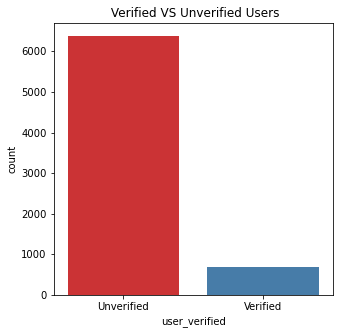

In [17]:
plt.figure(figsize=(5, 5))
sns.countplot(x ="user_verified",data=df, palette="Set1")
plt.title(" Verified VS Unverified Users")
plt.xticks([False,True],['Unverified','Verified'])
plt.show()

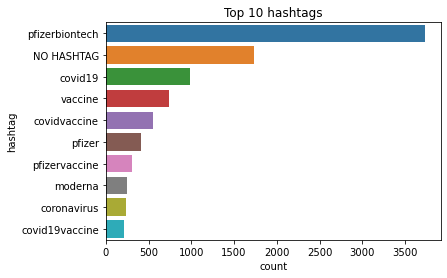

In [18]:
def split_hashtags(x): 
    return str(x).replace('[', '').replace(']', '').split(',')

df = df.copy()
df['hashtag'] = df['hashtags'].apply(lambda row : split_hashtags(row))
df = df.explode('hashtag')
df['hashtag'] = df['hashtag'].astype(str).str.lower().str.replace("'", '').str.replace(" ", '')
df.loc[df['hashtag']=='', 'hashtag'] = 'NO HASHTAG'


ds = df['hashtag'].value_counts().reset_index()
ds.columns = ['hashtag', 'count']
ds = ds.sort_values(['count'],ascending=False)
fig = sns.barplot(
    x=ds.head(10)["count"], 
    y=ds.head(10)['hashtag'], 
    orientation='horizontal', 
    #title='Top 20 hashtags', 
    #width=800, 
    #height=700
).set_title('Top 10 hashtags')

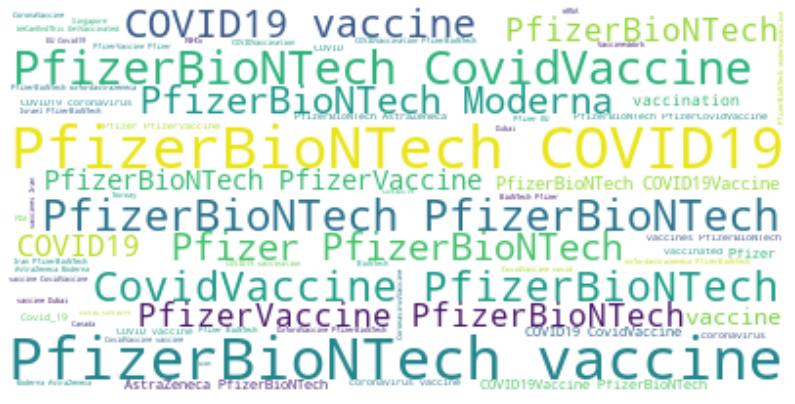

In [19]:
import itertools
from wordcloud import WordCloud

list_hashtags = df['hashtags'].dropna().str.lstrip('[').str.rstrip(']').str.replace("'", "").str.split(', ').tolist()
list_hashtags = list(itertools.chain(*list_hashtags))

plt.figure(figsize=(14,10))
wordcloud = WordCloud(max_font_size=50, max_words=100,background_color="white").generate(' '.join(list_hashtags))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

In [20]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

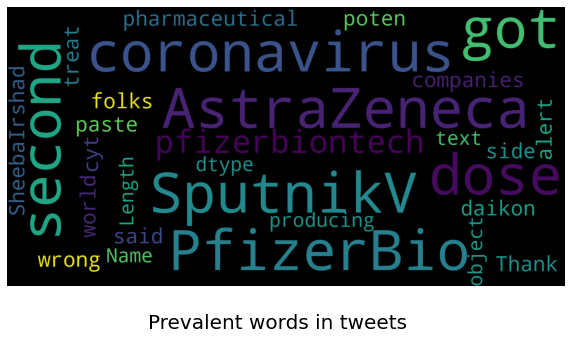

In [22]:
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=100,
        max_font_size=40, 
        scale=5,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(10,10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()
show_wordcloud(df['text'], title = 'Prevalent words in tweets')

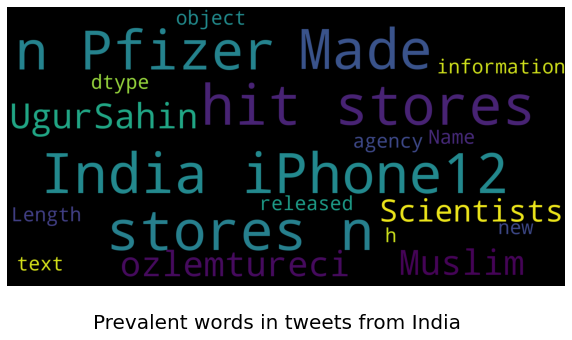

In [23]:
india_df = df.loc[df.user_location=="India"]
show_wordcloud(india_df['text'], title = 'Prevalent words in tweets from India')

In [24]:
text_list = df["text"].to_list()
text = ""
for i in text_list:
    text = text + i.split("https:")[0]
    
text = text.replace(" ",",")
text = re.sub("[\@\#\n\.\…\?\\\'\d\)\(\%\*]", ",", text)
text = re.sub(",{2,}", ",", text)

text[:1000]

'Same,folks,said,daikon,paste,could,treat,a,cytokine,storm,PfizerBioNTech,While,the,world,has,been,on,the,wrong,side,of,history,this,year,hopefully,the,biggest,vaccination,effort,we,ve,ev,coronavirus,SputnikV,AstraZeneca,PfizerBioNTech,Moderna,Covid_,Russian,vaccine,is,created,to,last,-,years,coronavirus,SputnikV,AstraZeneca,PfizerBioNTech,Moderna,Covid_,Russian,vaccine,is,created,to,last,-,years,coronavirus,SputnikV,AstraZeneca,PfizerBioNTech,Moderna,Covid_,Russian,vaccine,is,created,to,last,-,years,coronavirus,SputnikV,AstraZeneca,PfizerBioNTech,Moderna,Covid_,Russian,vaccine,is,created,to,last,-,years,coronavirus,SputnikV,AstraZeneca,PfizerBioNTech,Moderna,Covid_,Russian,vaccine,is,created,to,last,-,years,coronavirus,SputnikV,AstraZeneca,PfizerBioNTech,Moderna,Covid_,Russian,vaccine,is,created,to,last,-,years,Facts,are,immutable,Senator,even,when,you,re,not,ethically,sturdy,enough,to,acknowledge,them,You,were,born,i,Explain,to,me,again,why,we,need,a,vaccine,BorisJohnson,MattHancock,

In [25]:
text = text.split(',')
text[:10]

['Same',
 'folks',
 'said',
 'daikon',
 'paste',
 'could',
 'treat',
 'a',
 'cytokine',
 'storm']

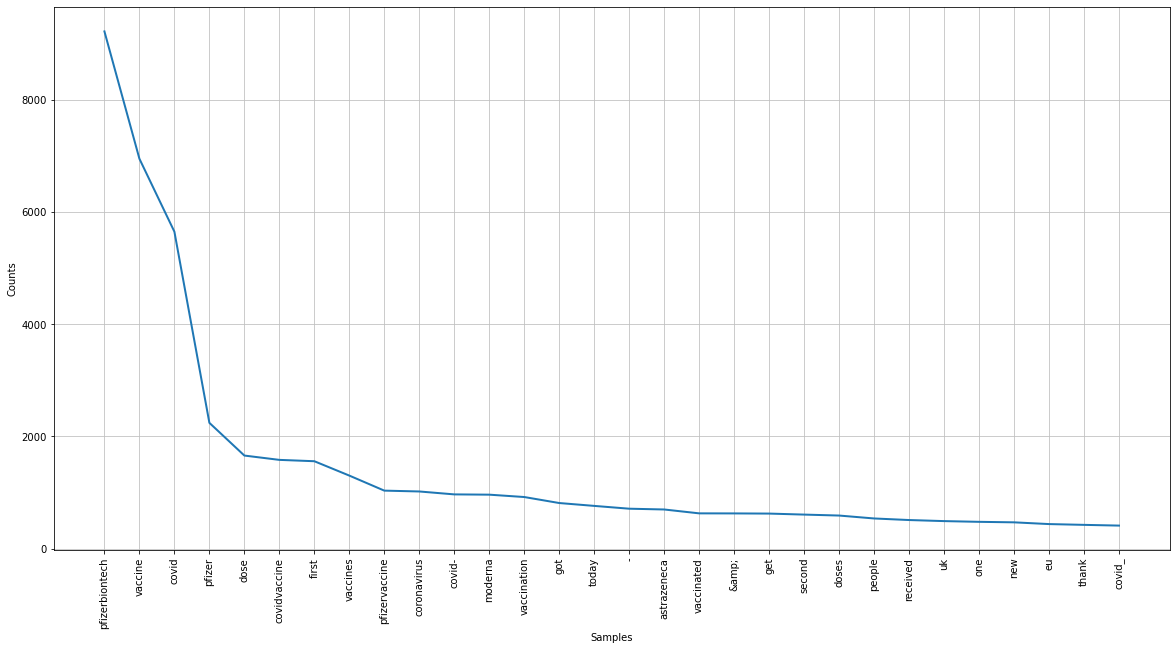

In [26]:
import re
from wordcloud import WordCloud
import nltk
import string
from nltk.corpus import stopwords
from nltk.probability import FreqDist

def stop_w(x):
    new_s = []
    for i in text:
        if i.lower() not in stopwords.words("english"):
            new_s.append(i.lower())
    return new_s

text = stop_w(text)

plt.figure(figsize=(20,10))
FreqDist(text).plot(30)

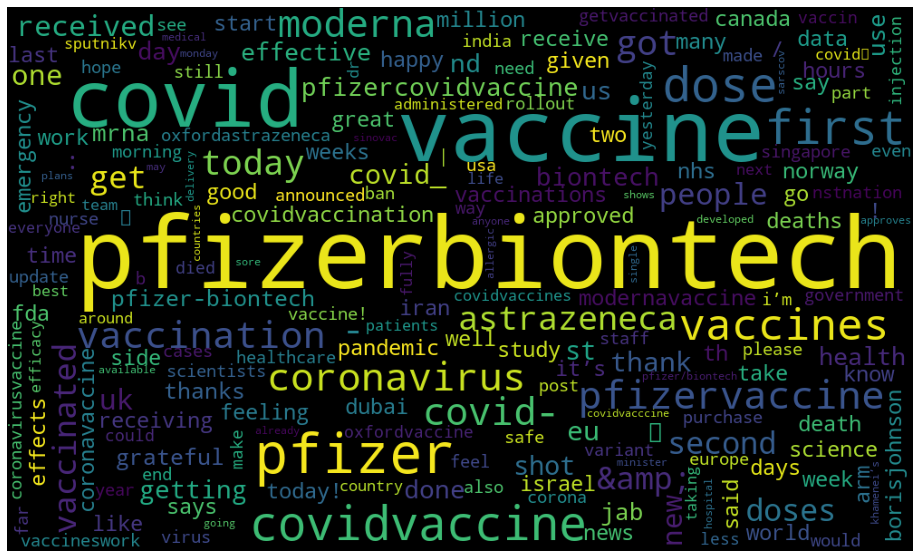

In [27]:
text_count = pd.Series(text).value_counts()
wc = WordCloud(width=1000, height=600, background_color="black", random_state=0)
plt.figure(figsize=(20,10),facecolor='w')
plt.imshow(wc.generate_from_frequencies(text_count))
plt.axis("off")
plt.show()

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.sentiment import SentimentIntensityAnalyzer
%matplotlib inline
from sklearn.decomposition import TruncatedSVD,PCA
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('vader_lexicon')
from sklearn.cluster import KMeans
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
from wordcloud import WordCloud,STOPWORDS
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import random
plt.rc('figure',figsize=(17,13))

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Neutral     3801
Positive    2208
Negative    1048
Name: Sentiment, dtype: int64


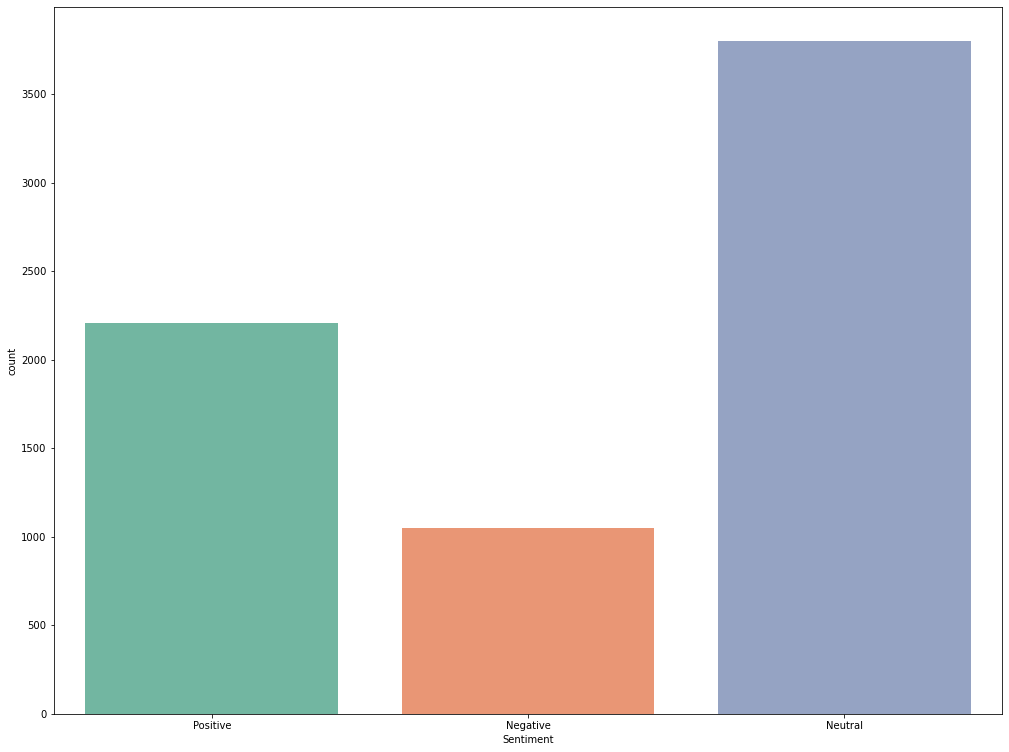

In [29]:
data = pd.read_csv('https://raw.githubusercontent.com/benvictoria17/pandas/master/dataset/Pfizer%20Vaccine%20Tweets/vaccination_tweets.csv').fillna('')
stop_words = (set(stopwords.words('english')))
sno = SnowballStemmer('english')

def remove_html_tags(sentence):
    regex = re.compile(pattern='<.*?>')
    clean_text = re.sub(regex, ' ', sentence)
    return clean_text

def remove_punctuations(word):
    cleaned_sentence = re.sub(pattern=r'[?|!|\|"|#|\']', repl=r'', string=word)
    cleaned_sentence = re.sub(pattern=r'[.|,|)|(|\|/]', repl=r'', string=cleaned_sentence)
    return cleaned_sentence

def get_preprocessed_data(data, feature, cleaned_feature):
        
        i = 0
        final_string = []

        sentences = data[feature].values
        for sentence in sentences:
            filtered_sentence = []
            sentence = remove_html_tags(sentence)
            for word in sentence.split():
                for clean_word in remove_punctuations(word).split():
                    if clean_word.isalpha() and len(clean_word) > 2:
                        if clean_word.lower() not in stop_words:
                            s = (sno.stem(clean_word.lower()))
                            filtered_sentence.append(s)

            string = " ".join(filtered_sentence)
            final_string.append(string)
            i += 1
        data[cleaned_feature] = final_string
        return data

data = get_preprocessed_data(data, 'text', 'Tidy Tweet')
data = get_preprocessed_data(data, 'hashtags', 'Tidy hashtags')
sentiment = SentimentIntensityAnalyzer()
def get_sentiment(data):
    sentiment_list = []
    for text in list(data['Tidy Tweet'].values):
        if sentiment.polarity_scores(text)["compound"] > 0:
            sentiment_list.append("Positive")
        elif sentiment.polarity_scores(text)["compound"] < 0:
            sentiment_list.append("Negative")
        else:
            sentiment_list.append("Neutral")
    return sentiment_list
        
data['Sentiment'] = get_sentiment(data)
sns.countplot(x="Sentiment", data=data, palette="Set2")
print(data.Sentiment.value_counts())

<AxesSubplot:title={'center':'Tweet count over a period of time'}, xlabel='Date', ylabel='Count'>

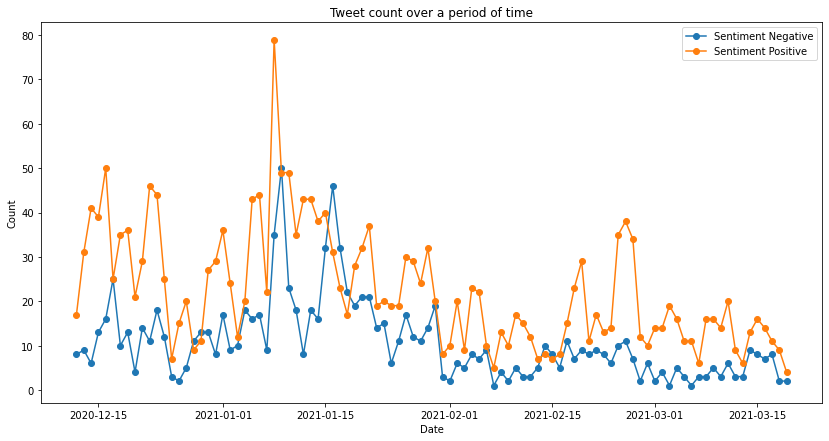

In [30]:
def get_word_cloud(sentiment):
    stop_words = (set(stopwords.words('english')))
    remove_words = ['vaccin', 'pfizerbiontech', 'coronavirus', 'pfizer', 'covid', 'covidvaccin', 'pfizervaccin']
    stop_words = remove_words + list(stop_words)
    plt.figure(figsize=[15,15])
    clean_tweets= "".join(list(data[data['Sentiment']==sentiment]['Tidy Tweet'].values))
    wordcloud = WordCloud(width=700,height=400, background_color='white',colormap='plasma', max_words=50, stopwords=stop_words, collocations=False).generate(clean_tweets)
    plt.title(f"Top 50 {sentiment} words used in tweets", fontsize=20)
    plt.imshow(wordcloud)
    return plt.show()
data['date'] = pd.to_datetime(data['date']).dt.date
negative_data = data[data['Sentiment']=='Negative'].reset_index()
positive_data = data[data['Sentiment']=='Positive'].reset_index()
grouped_data_neg = negative_data.groupby('date')['Sentiment'].count().reset_index()
grouped_data_pos = positive_data.groupby('date')['Sentiment'].count().reset_index()
merged_data = pd.merge(grouped_data_neg, grouped_data_pos, left_on='date', right_on='date', suffixes=(' Negative', ' Positive'))

merged_data.plot(x='date', y=['Sentiment Negative', 'Sentiment Positive'], figsize=(14, 7), marker='o', xlabel='Date', ylabel='Count', title='Tweet count over a period of time')

In [31]:
data.text = data.text.apply(lambda x:re.sub('@[^\s]+','',x))

#remove hashtags
data.text = data.text.apply(lambda x:re.sub(r'\B#\S+','',x))


# Remove URLS
data.text = data.text.apply(lambda x:re.sub(r"http\S+", "", x))

# Remove all the special characters
data.text = data.text.apply(lambda x:' '.join(re.findall(r'\w+', x)))

#remove all single characters
data.text = data.text.apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '', x))

# Substituting multiple spaces with single space
data.text = data.text.apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))
sid = SIA()
data['sentiments']           = data['text'].apply(lambda x: sid.polarity_scores(' '.join(re.findall(r'\w+',x.lower()))))
data['Positive Sentiment']   = data['sentiments'].apply(lambda x: x['pos']+1*(10**-6)) 
data['Neutral Sentiment']    = data['sentiments'].apply(lambda x: x['neu']+1*(10**-6))
data['Negative Sentiment']   = data['sentiments'].apply(lambda x: x['neg']+1*(10**-6))

data.drop(columns=['sentiments'],inplace=True)

In [32]:
data.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,...,source,retweets,favorites,is_retweet,Tidy Tweet,Tidy hashtags,Sentiment,Positive Sentiment,Neutral Sentiment,Negative Sentiment
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20,...,Twitter for Android,0,0,False,folk said daikon past could treat cytokin stor...,,Positive,0.000001,1.000001,0.000001
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13,...,Twitter Web App,1,1,False,world wrong side histori year hope biggest vac...,,Negative,0.109001,0.766001,0.125001
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12,...,Twitter for Android,0,0,False,coronavirus sputnikv astrazeneca pfizerbiontec...,sputnikv astrazeneca pfizerbiontech moderna,Neutral,0.250001,0.750001,0.000001
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12,...,Twitter Web App,446,2129,False,fact immut senat even your ethic sturdi enough...,,Neutral,0.000001,1.000001,0.000001
4,1337854064604966912,Citizen News Channel,,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12,...,Twitter for iPhone,0,0,False,explain need vaccin whereareallthesickpeopl,,Neutral,0.000001,1.000001,0.000001


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:1657: FutureWarning:

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:1657: FutureWarning:

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:1657: FutureWarning:

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:1657: FutureWarning:

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parame

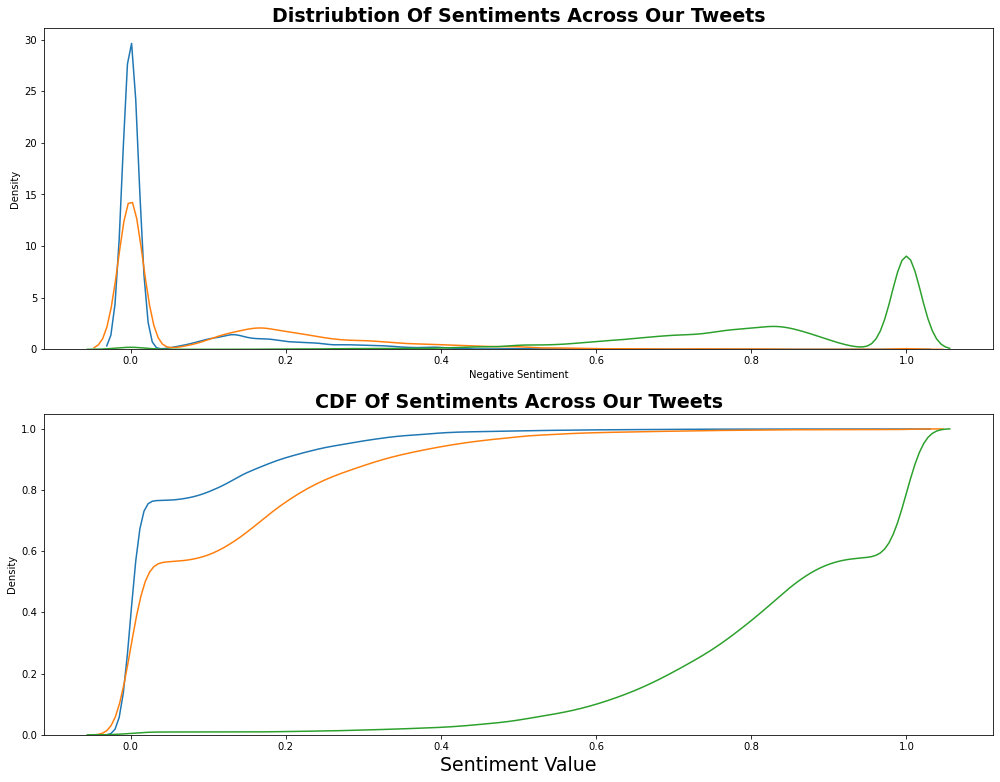

In [33]:
#Number of Words
data['Number_Of_Words'] = data.text.apply(lambda x:len(x.split(' ')))
#Average Word Length
data['Mean_Word_Length'] = data.text.apply(lambda x:np.round(np.mean([len(w) for w in x.split(' ')]),2) )
plt.subplot(2,1,1)
plt.title('Distriubtion Of Sentiments Across Our Tweets',fontsize=19,fontweight='bold')
sns.kdeplot(data['Negative Sentiment'],bw=0.1)
sns.kdeplot(data['Positive Sentiment'],bw=0.1)
sns.kdeplot(data['Neutral Sentiment'],bw=0.1)
plt.subplot(2,1,2)
plt.title('CDF Of Sentiments Across Our Tweets',fontsize=19,fontweight='bold')
sns.kdeplot(data['Negative Sentiment'],bw=0.1,cumulative=True)
sns.kdeplot(data['Positive Sentiment'],bw=0.1,cumulative=True)
sns.kdeplot(data['Neutral Sentiment'],bw=0.1,cumulative=True)
plt.xlabel('Sentiment Value',fontsize=19)
plt.show()

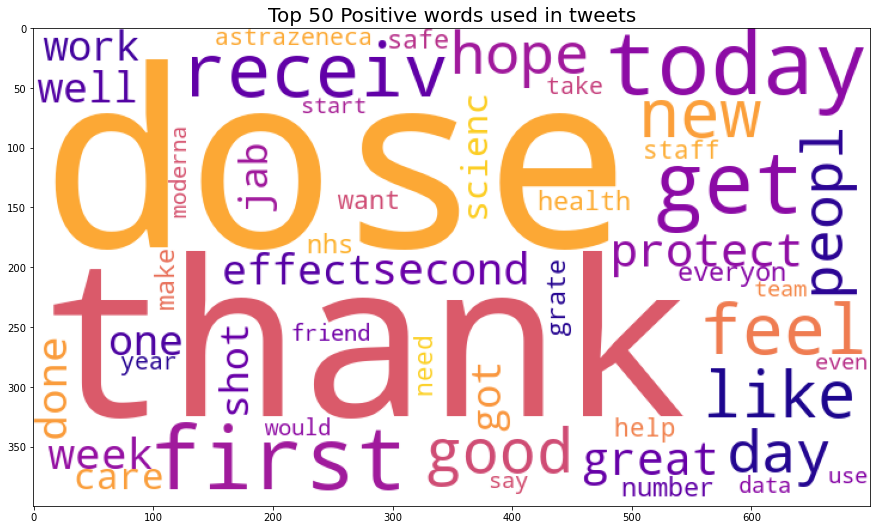

In [34]:
get_word_cloud(sentiment='Positive')

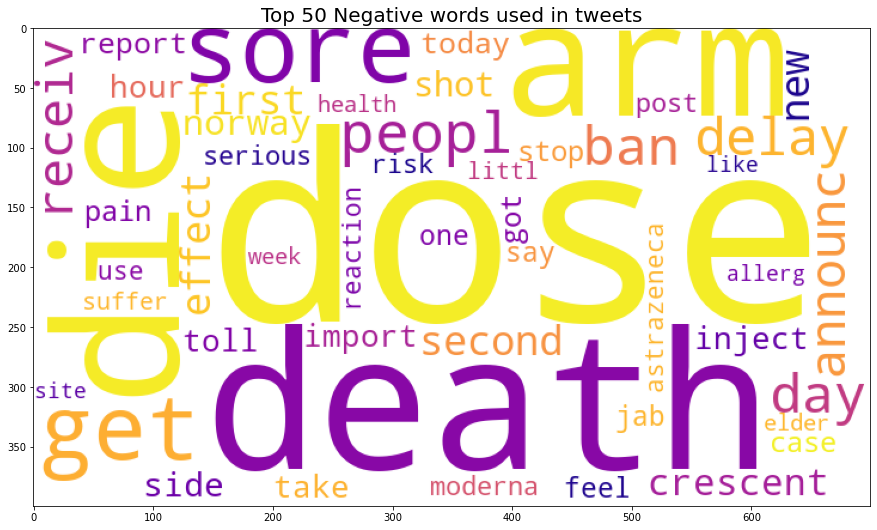

In [35]:
get_word_cloud(sentiment='Negative')

In [36]:
from plotly.subplots import make_subplots
b_date_mean = data.groupby(by='date').mean().reset_index()
b_date_std = data.groupby(by='date').std().reset_index()


fig = make_subplots(rows=2, cols=1,shared_xaxes=True,subplot_titles=('Daily Average Positive Sentiment',  'Daily Average Negative Sentiment'))

fig.add_trace(
    go.Scatter(x=b_date_mean['date'], y=b_date_mean['Positive Sentiment'],name='Positive Sentiment Mean'),
    row=1, col=1
)

    
#positive mean
fig.add_shape(type="line",
    x0=b_date_mean['date'].values[0], y0=b_date_mean['Positive Sentiment'].mean(), x1=b_date_mean['date'].values[-1], y1=b_date_mean['Positive Sentiment'].mean(),
    line=dict(
        color="Red",
        width=2,
        dash="dashdot",
    ),
        name='Mean'
)

fig.add_annotation(x=b_date_mean['date'].values[3], y=b_date_mean['Positive Sentiment'].mean(),
            text=r"$\mu : {:.2f}$".format(b_date_mean['Positive Sentiment'].mean()),
            showarrow=True,
            arrowhead=3,
            yshift=10)



fig.add_trace(
    go.Scatter(x=b_date_mean['date'], y=b_date_mean['Negative Sentiment'],name='Negative Sentiment Mean'),
    row=2, col=1
)

#negative mean
fig.add_shape(type="line",
    x0=b_date_mean['date'].values[0], y0=b_date_mean['Negative Sentiment'].mean(), x1=b_date_mean['date'].values[-1], y1=b_date_mean['Negative Sentiment'].mean(),
    line=dict(
        color="Red",
        width=2,
        dash="dashdot",
    ),
        name='Mean',
        xref='x2', 
        yref='y2'
)

fig.add_annotation(x=b_date_mean['date'].values[3], y=b_date_mean['Negative Sentiment'].mean(),
            text=r"$\mu : {:.2f}$".format(b_date_mean['Negative Sentiment'].mean()),
            showarrow=True,
            arrowhead=3,
            yshift=10,
            xref='x2', 
            yref='y2')



fig.add_annotation(x=b_date_mean['date'].values[5], y=b_date_mean['Negative Sentiment'].mean()+0.01,
            text=r"Start Of Decline",
            showarrow=True,
            arrowhead=6,
            yshift=10,
            xref='x2', 
            yref='y2')

fig.add_annotation(x=b_date_mean['date'].values[15], y=.024,
            text=r"Start Of Incline",
            showarrow=True,
            arrowhead=6,
            yshift=10,
            xref='x2', 
            yref='y2')

fig['layout']['xaxis2']['title'] = 'Date'
fig.update_layout(height=700, width=900, title_text="Sentiment Average Change With Time")
fig.show()
import plotly.express as ex
def clean_text(text):    
    text = str(text).lower()
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    
    return text
data['text'] = data['text'].apply(lambda x:clean_text(x))
data['text']

0       same folks said daikon paste could treatcytoki...
1       while the world has been on the wrong side of ...
2            russian vaccine is created to last 2 4 years
3       facts are immutable senator even when you re n...
4                  explain to me again why we needvaccine
                              ...                        
7052    the is piling on fresh orders for the presiden...
7053    thousand peoples canwithdraw their money from ...
7054    thank you for the alert to potential dangers f...
7055    how the pharmaceutical companies producing the...
7056    i have got my second dose of 2 weeks ago today...
Name: text, Length: 7057, dtype: object

In [37]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [38]:
df=pd.DataFrame()
df['text']=data['text']
def tokenization(text):
    text = re.split('\W+', text)
    return text

df['tokenized'] = df['text'].apply(lambda x: tokenization(x.lower()))
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
df['No_stopwords'] = df['tokenized'].apply(lambda x: remove_stopwords(x))

ps = nltk.PorterStemmer()

def stemming1(text):
    text = [ps.stem(word) for word in text]
    return text

df['stemmed_porter'] = df['No_stopwords'].apply(lambda x: stemming1(x))

from nltk.stem.snowball import SnowballStemmer
s_stemmer = SnowballStemmer(language='english')
def stemming2(text):
    text = [s_stemmer.stem(word) for word in text]
    return text
df['stemmed_snowball'] = df['No_stopwords'].apply(lambda x: stemming2(x))

wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

df['lemmatized'] = df['No_stopwords'].apply(lambda x: lemmatizer(x))

In [39]:
df.head()

,text,tokenized,No_stopwords,stemmed_porter,stemmed_snowball,lemmatized
0,same folks said daikon paste could treatcytoki...,"[same, folks, said, daikon, paste, could, trea...","[folks, said, daikon, paste, could, treatcytok...","[folk, said, daikon, past, could, treatcytokin...","[folk, said, daikon, past, could, treatcytokin...","[folk, said, daikon, paste, could, treatcytoki..."
1,while the world has been on the wrong side of ...,"[while, the, world, has, been, on, the, wrong,...","[world, wrong, side, history, year, hopefully,...","[world, wrong, side, histori, year, hope, bigg...","[world, wrong, side, histori, year, hope, bigg...","[world, wrong, side, history, year, hopefully,..."
2,russian vaccine is created to last 2 4 years,"[russian, vaccine, is, created, to, last, 2, 4...","[russian, vaccine, created, last, 2, 4, years]","[russian, vaccin, creat, last, 2, 4, year]","[russian, vaccin, creat, last, 2, 4, year]","[russian, vaccine, created, last, 2, 4, year]"
3,facts are immutable senator even when you re n...,"[facts, are, immutable, senator, even, when, y...","[facts, immutable, senator, even, ethically, s...","[fact, immut, senat, even, ethic, sturdi, enou...","[fact, immut, senat, even, ethic, sturdi, enou...","[fact, immutable, senator, even, ethically, st..."
4,explain to me again why we needvaccine,"[explain, to, me, again, why, we, needvaccine]","[explain, needvaccine]","[explain, needvaccin]","[explain, needvaccin]","[explain, needvaccine]"


In [40]:
data['text']=df['lemmatized']
data.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,...,favorites,is_retweet,Tidy Tweet,Tidy hashtags,Sentiment,Positive Sentiment,Neutral Sentiment,Negative Sentiment,Number_Of_Words,Mean_Word_Length
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20,...,0,False,folk said daikon past could treat cytokin stor...,,Positive,0.000001,1.000001,0.000001,8,5.88
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13,...,1,False,world wrong side histori year hope biggest vac...,,Negative,0.109001,0.766001,0.125001,21,4.43
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12,...,0,False,coronavirus sputnikv astrazeneca pfizerbiontec...,sputnikv astrazeneca pfizerbiontech moderna,Neutral,0.250001,0.750001,0.000001,9,4.00
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12,...,2129,False,fact immut senat even your ethic sturdi enough...,,Neutral,0.000001,1.000001,0.000001,20,4.55
4,1337854064604966912,Citizen News Channel,,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12,...,0,False,explain need vaccin whereareallthesickpeopl,,Neutral,0.000001,1.000001,0.000001,7,4.57


In [41]:
temp = data.groupby('Sentiment').count()['text'].reset_index().sort_values(by='text',ascending=False)
temp.style.background_gradient(cmap='Greens')

,Sentiment,text
1,Neutral,3801
2,Positive,2208
0,Negative,1048


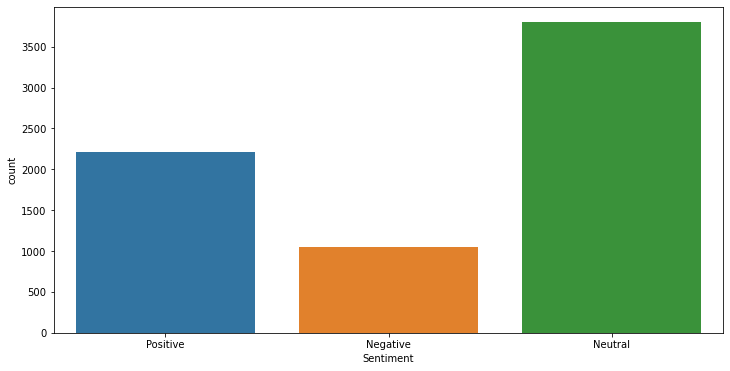

In [42]:
plt.figure(figsize=(12,6))
sns.countplot(x='Sentiment',data=data)
fig = go.Figure(go.Funnelarea(
    text =temp.Sentiment,
    values = temp.text,
    title = {"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
    ))
fig.show()

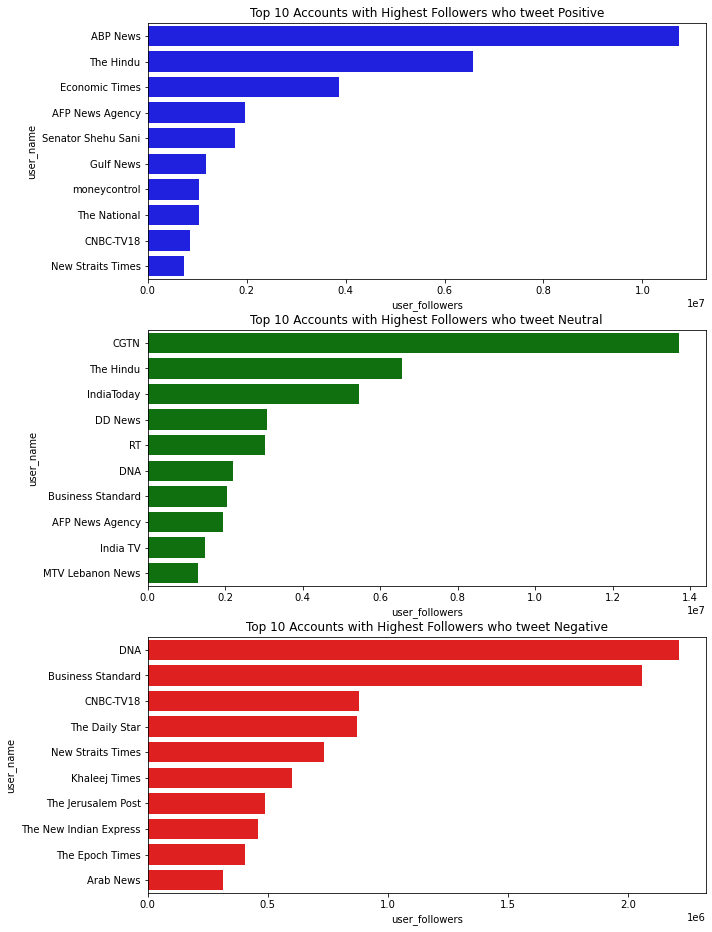

In [43]:
from matplotlib import rcParams
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(10, 16))
sns.barplot(x="user_followers", y="user_name", orient="h", ax=ax1, palette=["b"],
           data=data[(data.Sentiment== "Positive")]\
           .drop_duplicates(subset=["user_name"])\
           .sort_values(by=["user_followers"], ascending=False)[["user_name", "user_followers"]][:10])
ax1.set_title('Top 10 Accounts with Highest Followers who tweet Positive')
sns.barplot(x="user_followers", y="user_name", orient="h", ax=ax2, palette=["g"],
           data=data[(data.Sentiment == "Neutral")]
           .drop_duplicates(subset=["user_name"])\
           .sort_values(by=["user_followers"], ascending=False)[["user_name", "user_followers"]][:10])
ax2.set_title('Top 10 Accounts with Highest Followers who tweet Neutral')
sns.barplot(x="user_followers", y="user_name", orient="h", ax=ax3, palette=["r"],
           data=data[(data.Sentiment == "Negative")]
           .drop_duplicates(subset=["user_name"])\
           .sort_values(by=["user_followers"], ascending=False)[["user_name", "user_followers"]][:10])
ax3.set_title('Top 10 Accounts with Highest Followers who tweet Negative')

fig.show()

<Figure size 2880x720 with 0 Axes>

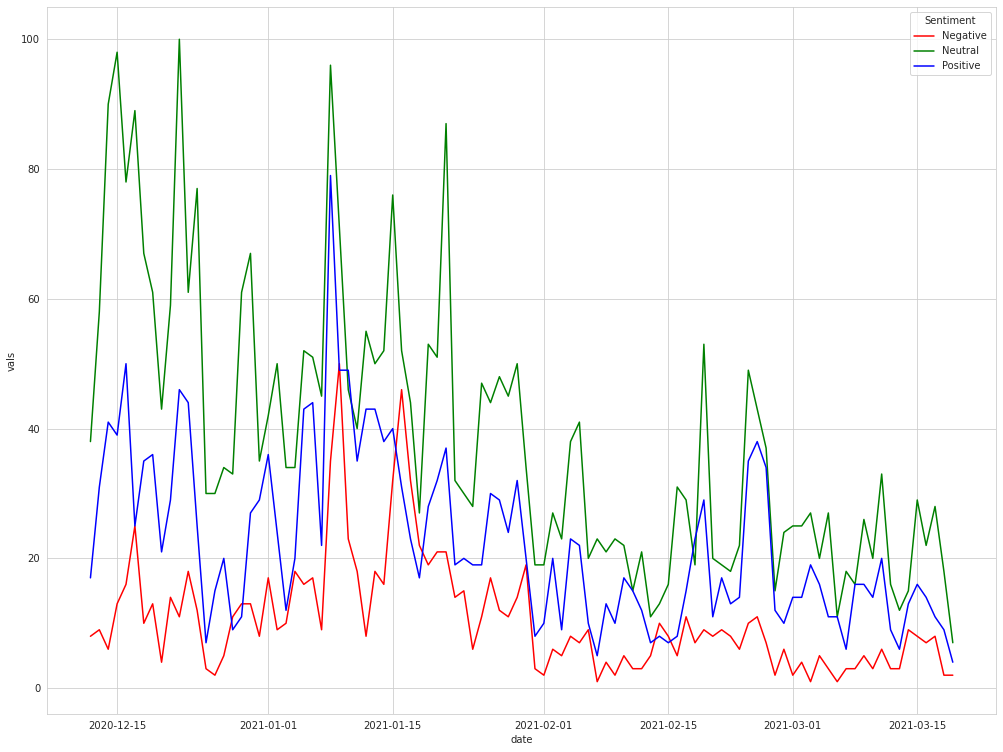

<Figure size 2880x720 with 0 Axes>

In [44]:
data["date"] = pd.to_datetime(data.date) 
timeline = data.resample('D', on='date')["Sentiment"].value_counts().unstack(1)

timeline.reset_index(inplace=True)

timeline = timeline.melt("date", var_name='Sentiment',  value_name='vals')

sns.set_style("whitegrid")
sns.lineplot(x="date", y="vals", hue="Sentiment", data=timeline, palette=["r", "g","b"])
plt.figure(figsize=(40,10))

In [45]:
print("Summary statistics of numerical features : \n", data.describe())

Summary statistics of numerical features : 
                  id  user_followers  user_friends  user_favourites  \
count  7.057000e+03    7.057000e+03   7057.000000      7057.000000   
mean   1.351601e+18    3.749208e+04   1166.323934     14122.861272   
std    9.556500e+15    3.080855e+05   2629.199746     40690.890814   
min    1.337728e+18    0.000000e+00      0.000000         0.000000   
25%    1.343943e+18    1.110000e+02    167.000000       411.000000   
50%    1.350008e+18    4.840000e+02    465.000000      2266.000000   
75%    1.358073e+18    2.110000e+03   1242.000000     11113.000000   
max    1.372826e+18    1.371493e+07  99129.000000    924667.000000   

          retweets    favorites  Positive Sentiment  Neutral Sentiment  \
count  7057.000000  7057.000000         7057.000000        7057.000000   
mean      1.573898     9.123565            0.109817           0.836231   
std      13.758237    62.736121            0.156712           0.185878   
min       0.000000     0.000

In [46]:
data['year']         = pd.DatetimeIndex(data['date']).year
import datetime
b_date_count = data.groupby(by='date').count().reset_index()
b_date_count = b_date_count.rename(columns={'id':'Tweets Per Day'})
fig = ex.line(b_date_count,x='date',y='Tweets Per Day')

# fig.add_annotation(x=b_date_mean['date'].values[15], y=.024,
#             text=r"Start Of Incline",
#             showarrow=True,
#             arrowhead=6,
#             yshift=10)


fig.add_shape(type="line",
    x0=b_date_count['date'].values[0], y0=b_date_count['Negative Sentiment'].mean(), x1=b_date_count['date'].values[-1], y1=b_date_count['Negative Sentiment'].mean(),
    line=dict(
        color="Red",
        width=2,
        dash="dashdot",
    ),
        name='Mean',
)

fig.update_traces(mode="markers+lines")
fig.update_layout(hovermode="x unified")


###annots
b_date_count.date = pd.to_datetime(b_date_count.date)
b_date_count_dt = b_date_count.set_index('date')
fig.add_annotation(x=datetime.datetime(2021,2,19), y=b_date_count_dt.loc[pd.Timestamp('2021-02-19'),'year'],
            text=r"Israeli study finds Pfizer vaccine 85% effective after first shot",
            showarrow=True,
            arrowhead=3,
            yshift=5,bordercolor="#c7c7c7")

fig.add_annotation(x=datetime.datetime(2021,1,29), y=b_date_count_dt.loc[pd.Timestamp('2021-01-29'),'year'],
            text=r"vaccine found to be effective against variant discovered in U.K.",
            showarrow=True,
            arrowhead=3,
            yshift=5,ay=-160,bordercolor="#c7c7c7")
fig.add_annotation(x=datetime.datetime(2021,1,8), y=b_date_count_dt.loc[pd.Timestamp('2021-01-8'),'year'],
            text=r"Commission proposes to purchase up to 300 million additional doses of BioNTech-Pfizer vaccine",
            showarrow=True,
            arrowhead=3,
            yshift=5,ay=-30,bordercolor="#c7c7c7")

fig.add_annotation(x=datetime.datetime(2021,1,20), y=b_date_count_dt.loc[pd.Timestamp('2021-01-20'),'year'],
            text=r"The presidency of Joe Biden began",
            showarrow=True,
            arrowhead=3,
            yshift=3,ay=120,bordercolor="#c7c7c7")

fig.update_layout(title='<b> TREND ANALYSIS OF TWEETS WITH EVENTS ASSOCIATED TO THAT PARTICULAR DATE <b>',width=1200)
fig.show()